In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# For measuring our models performance
from sklearn import metrics
from time import time

# Import various model stuff
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
## Import the metrics we'll be using
from sklearn import metrics
## Import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression

import statsmodels

In [18]:
df = pd.read_csv('Swan_Project_Data.csv')

In [262]:
pd.set_option('display.max_columns', None)

In [39]:
pd.set_option('display.max_rows', None)

In [7]:
df.shape

(7043, 31)

In [8]:
df.CustomerID.nunique()

7043

In [9]:
df.Country.unique()

array(['United States'], dtype=object)

In [10]:
df.State.unique()

array(['California'], dtype=object)

In [11]:
df.City.unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [12]:
df.City.nunique()

1129

In [ ]:
#Lat long need to be checked

In [14]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [80]:
#Handling missing values
def null_vals(dataframe):
#Function to show both number of nulls and the percentage of nulls in the whole column
    null_vals = dataframe.isnull().sum() # How many nulls in each column
    total_cnt = len(dataframe) # Total entries in the dataframe
    null_vals = pd.DataFrame(null_vals,columns=['null']) # Put the number of nulls in a single dataframe
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3) # Round how many nulls are there, as %, of the df
    
    return null_vals.sort_values('percent', ascending=False) #Return the number and percentage of missing values, order by percentage descending
null_vals(df) #Display the table

,null,percent
Churn Reason,5174,73.463
Internet Service,0,0.000
Churn Value,0,0.000
Churn Label,0,0.000
Total Charges,0,0.000
Monthly Charges,0,0.000
Payment Method,0,0.000
Paperless Billing,0,0.000
Contract,0,0.000
Streaming Movies,0,0.000


In [19]:
df['Churn Value'][df['Churn Label'] == 'Yes'].value_counts()

1    1869
Name: Churn Value, dtype: int64

In [20]:
df['Churn Value'][df['Churn Label'] == 'No'].value_counts()

0    5174
Name: Churn Value, dtype: int64

In [23]:
df['Churn Reason'].value_counts()

Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: Churn Reason, 

In [25]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [33]:
import re

In [81]:
# # Checking the format of Total charges because we can't cast float dtype
# df['Total Charges'].strip().astype(float)

# #str.findall('[^0-9A-Za-z]+')

In [4]:
# Indexes, where total charge is blank: 2234, 2438, 2568, 2667, 2856, 4331, 4687, 5104, 5719, 6772, 6840

empty_string_indices = df[df['Total Charges'] == ' '].index
empty_string_indices

Int64Index([2234, 2438, 2568, 2667, 2856, 4331, 4687, 5104, 5719, 6772, 6840], dtype='int64')

In [78]:
df['Total Charges'].isnull().sum()

0

In [19]:
#Changing total chares to numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [20]:
#Filling missing total charge values with 0
df['Total Charges'] = df['Total Charges'].fillna(value = 0)

In [21]:
df['Total Charges'] = df['Total Charges'].astype(float)

In [ ]:
#Sanity check failed
df['Total Charges'] == df['Tenure Months'] * df['Monthly Charges']
#Ask Alex what to do with missing values of Total Charges
#We could create a new column for additional charges: total - (months * monthly charges)

In [79]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2279.734304,0.265370
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.794470,0.441561
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,398.550000,0.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1394.550000,0.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000


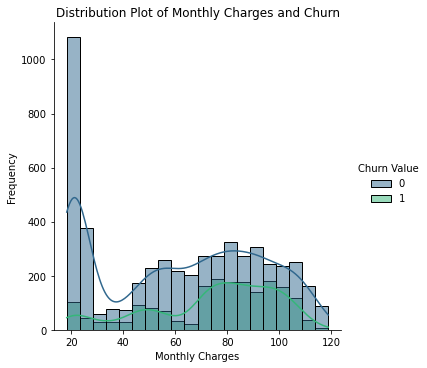

In [568]:
#Is churn related to amount of monthly charges?
sns.displot(data=df, x='Monthly Charges', hue='Churn Value', kind='hist', kde=True, palette='viridis', bins=20)
plt.title('Distribution Plot of Monthly Charges and Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.savefig('monthly_charges_churn.png')
plt.show()

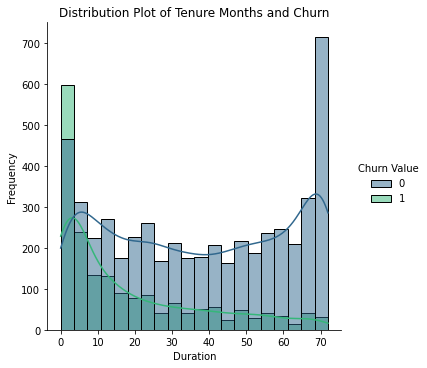

In [567]:
#Is churn related to duration of service?
sns.displot(data=df, x='Tenure Months', hue='Churn Value', kind='hist', kde=True, palette='viridis', bins=20)
plt.title('Distribution Plot of Tenure Months and Churn')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.savefig("months_churn.png")
plt.show()


### Demographics of churners

In [134]:
df['Senior Citizen'].value_counts()

No     5901
Yes    1142
Name: Senior Citizen, dtype: int64

In [131]:
df['Churn Value'].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

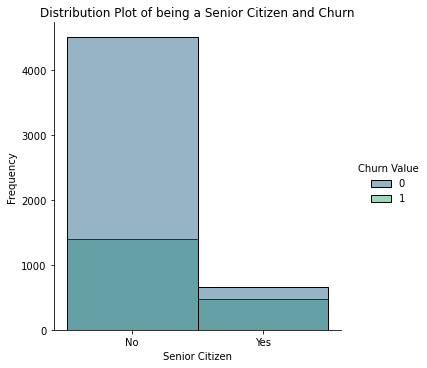

In [135]:
# do seniors churn more?
sns.displot(data=df, x='Senior Citizen', kind='hist', hue = 'Churn Value',palette='viridis', bins=2)
plt.title('Distribution Plot of being a Senior Citizen and Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Frequency')
plt.savefig("senior_citizen_plot.png")
plt.show()

In [293]:
df['Senior Citizen'].value_counts()[0]

5901

In [ ]:
sns.displot(data=df, x=df['Senior Citizen'], hue = df['Churn Value'], kind='hist', palette='viridis', bins=20)
plt.title('Distribution Plot of Age and Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Frequency')
plt.show()

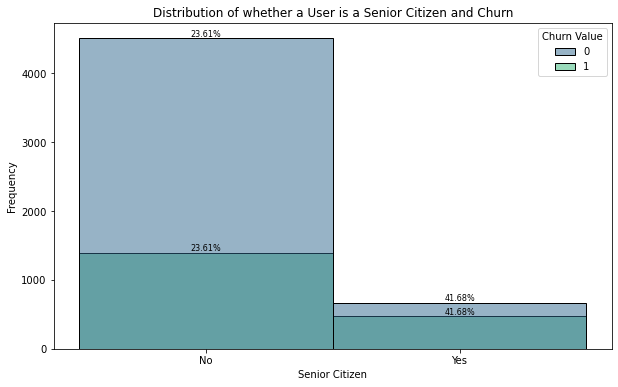

In [8]:
# Calculate the churn percentage for each group
churn_percentages = df.groupby('Senior Citizen')['Churn Value'].mean() * 100

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df, x='Senior Citizen', hue='Churn Value', palette='viridis', bins=20, ax=ax)

# Add the churn percentage to the bars
for i, bar in enumerate(ax.patches):
    if i % 2 == 0:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{churn_percentages[0]:.2f}%", ha='center', va='bottom', fontsize=8)
    else:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{churn_percentages[1]:.2f}%", ha='center', va='bottom', fontsize=8)

plt.title('Distribution of whether a User is a Senior Citizen and Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Frequency')
plt.savefig("senior_citizen_plot.png")
plt.show()

In [11]:
churn_counts

Senior Citizen  Churn Value
No              0              4508
                1              1393
Yes             0               666
                1               476
dtype: int64

In [24]:
total_count1

5901

In [25]:
total_count2

1142

In [26]:
churn_percentages1

Churn Value,0,1
Senior Citizen,,
No,76.393832,23.606168
Yes,11.286223,8.066429


In [31]:
churn_percentages.iloc[1, 1]

8.066429418742587

In [108]:
df['Senior Citizen'].value_counts()

No     5901
Yes    1142
Name: Senior Citizen, dtype: int64

In [59]:
group = df.groupby('Senior Citizen')['Churn Value'].mean() * 100

order = ['No', 'Yes']

churn_percentages = group.reindex(order)

In [60]:
churn_percentages

Senior Citizen
No     23.606168
Yes    41.681261
Name: Churn Value, dtype: float64

In [71]:
df[(df['Senior Citizen'] == 'No') & (df['Churn Value'] == 1)].shape[0]

1393

In [106]:
senior_churn = df[(df['Senior Citizen'] == 'Yes') & (df['Churn Value'] == 1)].shape[0]
senior_total = df[df['Senior Citizen'] == 'Yes'].shape[0]
senior_churn_pct = (senior_churn / senior_total) * 100

non_senior_churn = df[(df['Senior Citizen'] == 'No') & (df['Churn Value'] == 1)].shape[0]
non_senior_total = df[df['Senior Citizen'] == 'No'].shape[0]
non_senior_churn_pct = (non_senior_churn / non_senior_total) * 100

In [109]:
senior_churn

476

In [107]:
df[(df['Senior Citizen'] == 'Yes') & (df['Churn Value'] == 0)].shape[0]

666

In [110]:
senior_total

1142

In [111]:
senior_churn_pct

41.68126094570928

In [91]:
df[(df['Senior Citizen'] == 'No') & (df['Churn Value'] == 1)].shape

(1393, 31)

In [94]:
df[(df['Senior Citizen'] == 'No') & (df['Churn Value'] == 0)].shape

(4508, 31)

In [95]:
df[(df['Senior Citizen'] == 'Yes') & (df['Churn Value'] == 1)].shape

(476, 31)

In [96]:
df[(df['Senior Citizen'] == 'Yes') & (df['Churn Value'] == 0)].shape

(666, 31)

In [102]:
senior_churn_pct

41.68126094570928

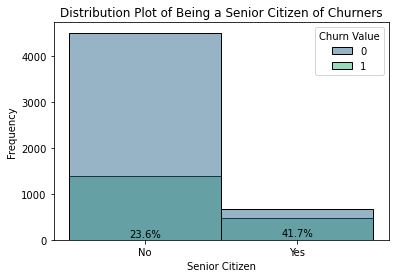

In [112]:
senior_churn = df[(df['Senior Citizen'] == 'Yes') & (df['Churn Value'] == 1)].shape[0]
senior_total = df[df['Senior Citizen'] == 'Yes'].shape[0]
senior_churn_pct = (senior_churn / senior_total) * 100

non_senior_churn = df[(df['Senior Citizen'] == 'No') & (df['Churn Value'] == 1)].shape[0]
non_senior_total = df[df['Senior Citizen'] == 'No'].shape[0]
non_senior_churn_pct = (non_senior_churn / non_senior_total) * 100

group = df.groupby('Senior Citizen')['Churn Value'].mean() * 100

order = ['No', 'Yes']

churn_percentages = [non_senior_churn_pct, senior_churn_pct]


sns.histplot(data=df, x='Senior Citizen', hue='Churn Value', bins=20, palette='viridis')

for i, percentage in enumerate(churn_percentages):
    plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom')

plt.title('Distribution Plot of Being a Senior Citizen of Churners')
plt.xlabel('Senior Citizen')
plt.ylabel('Frequency')
plt.show()

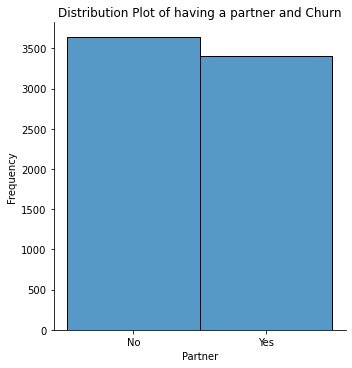

In [284]:
# do people, who have a partner churn more?
sns.displot(data=df[df['Churn Value'] == 1], x=df['Partner'],  kind='hist', palette='viridis', bins=20)
plt.title('Distribution Plot of Having a Partner of Churners')
plt.xlabel('Partner')
plt.ylabel('Frequency')
plt.show()

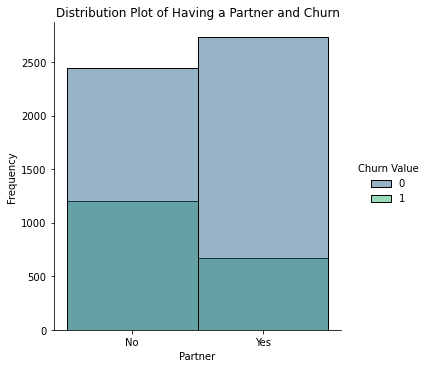

In [566]:
sns.displot(data=df, x=df['Partner'], hue = df['Churn Value'], kind='hist', palette='viridis', bins=20)
plt.title('Distribution Plot of Having a Partner and Churn')
plt.xlabel('Partner')#rename
plt.ylabel('Frequency')
plt.savefig("partner_plot.png")
plt.show()


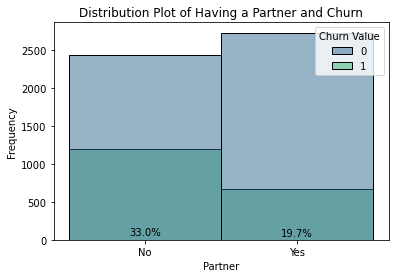

In [573]:
group = df.groupby('Partner')['Churn Value'].mean() * 100

order = ['No', 'Yes']

churn_percentages = group.reindex(order)


sns.histplot(data=df, x='Partner', hue='Churn Value', bins=20, palette='viridis')

for i, percentage in enumerate(churn_percentages):
    plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom')
    tech_support_churned = df[(df['Tech Support'] == 'Yes') & (df['Churn Value'] == 1)].shape[0]
    tech_support_not_churned = df[(df['Tech Support'] == 'Yes') & (df['Churn Value'] == 0)].shape[0]

tech_support_churned/(tech_support_churned + tech_support_not_churned) * 100

plt.title('Distribution Plot of Having a Partner and Churn')
plt.xlabel('Partner')
plt.ylabel('Frequency')
plt.savefig('partner_plot.png')
plt.show()

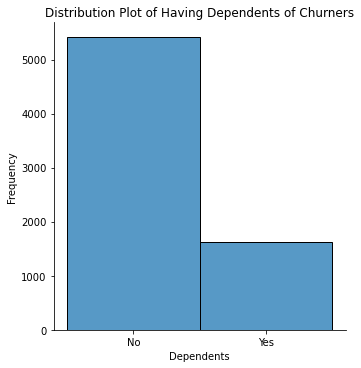

In [564]:
#do customers who have dependents churn more?
sns.displot(data=df[df['Churn Value'] == 1], x=df['Dependents'],  kind='hist', palette='viridis', bins=20)
plt.title('Distribution Plot of Having Dependents of Churners')
plt.xlabel('Dependents')
plt.ylabel('Frequency')
plt.show()


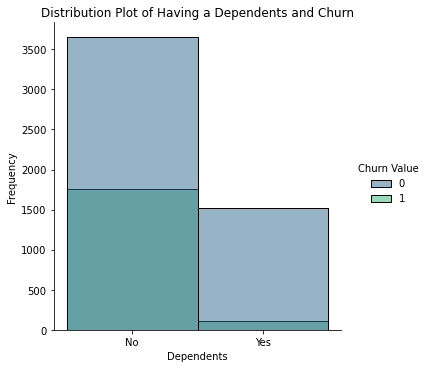

In [574]:
sns.displot(data=df, x=df['Dependents'], hue = df['Churn Value'], kind='hist', palette='viridis', bins=20)
plt.title('Distribution Plot of Having a Dependents and Churn')
plt.xlabel('Dependents')
plt.ylabel('Frequency')
plt.savefig('dependents_plot.png', bbox_inches='tight')
plt.show()


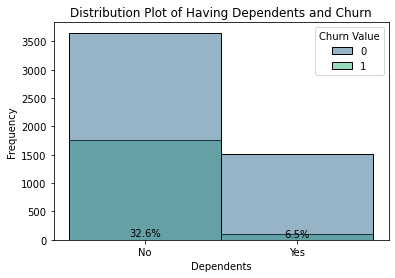

In [571]:
group = df.groupby('Dependents')['Churn Value'].mean() * 100

order = ['No', 'Yes']

churn_percentages = group.reindex(order)


sns.histplot(data=df, x='Dependents', hue='Churn Value', bins=20, palette='viridis')

for i, percentage in enumerate(churn_percentages):
    plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom')

plt.title('Distribution Plot of Having Dependents and Churn')
plt.xlabel('Dependents')
plt.ylabel('Frequency')
plt.savefig('dependents_plot.png')
plt.show()

In [313]:
df['Tech Support'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: Tech Support, dtype: int64

In [648]:
df_supp = df[['Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Churn Value']]

In [649]:
df_supp['Online Security'] = df['Online Security'].map({'No':0, 'Yes': 1, 'No internet service' : 2})

/var/folders/fl/qc3l7n_94138j5q0q1lz5x0w0000gn/T/ipykernel_14565/3596692886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_supp['Online Security'] = df['Online Security'].map({'No':0, 'Yes': 1, 'No internet service' : 2})


In [650]:
df_supp['Online Backup'] = df['Online Backup'].map({'No':0, 'Yes': 1, 'No internet service' : 2})

/var/folders/fl/qc3l7n_94138j5q0q1lz5x0w0000gn/T/ipykernel_14565/1497012448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_supp['Online Backup'] = df['Online Backup'].map({'No':0, 'Yes': 1, 'No internet service' : 2})


In [651]:
df_supp['Device Protection'] = df['Device Protection'].map({'No':0, 'Yes': 1, 'No internet service' : 2})

/var/folders/fl/qc3l7n_94138j5q0q1lz5x0w0000gn/T/ipykernel_14565/3676092679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_supp['Device Protection'] = df['Device Protection'].map({'No':0, 'Yes': 1, 'No internet service' : 2})


In [652]:
df_supp['Tech Support'] = df['Tech Support'].map({'No':0, 'Yes': 1, 'No internet service' : 2})

/var/folders/fl/qc3l7n_94138j5q0q1lz5x0w0000gn/T/ipykernel_14565/3587074358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_supp['Tech Support'] = df['Tech Support'].map({'No':0, 'Yes': 1, 'No internet service' : 2})


In [655]:
df_supp.shape

(7043, 5)

In [322]:
df_melt = pd.melt(
    df_supp,
    id_vars=None,
    value_vars=['Online Security', 'Online Backup', 'Device Protection', 'Tech Support'],
    var_name='variable',
    value_name='value',
    ignore_index=True
)

In [579]:
df_melt = pd.melt(
    df_supp, id_vars = 'Churn Value',
)

In [622]:
df[['Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Churn Value']]

,Online Security,Online Backup,Device Protection,Tech Support,Churn Value
0,Yes,Yes,No,No,1
1,No,No,No,No,1
2,No,No,Yes,No,1
3,No,No,Yes,Yes,1
4,No,Yes,Yes,No,1
...,...,...,...,...,...
7038,No internet service,No internet service,No internet service,No internet service,0
7039,Yes,No,Yes,Yes,0
7040,No,Yes,Yes,No,0
7041,Yes,No,No,No,0


In [628]:
df_supp.to_csv('df_supp_1.csv', sep=',', index=False, encoding='utf-8')

In [348]:
df_melt.value = df_melt.value.value_counts()

In [624]:
df_supp = df_supp[df_supp['Online Security'] != 2]

In [627]:
df_supp

0    3088
1    2429
Name: Online Backup, dtype: int64

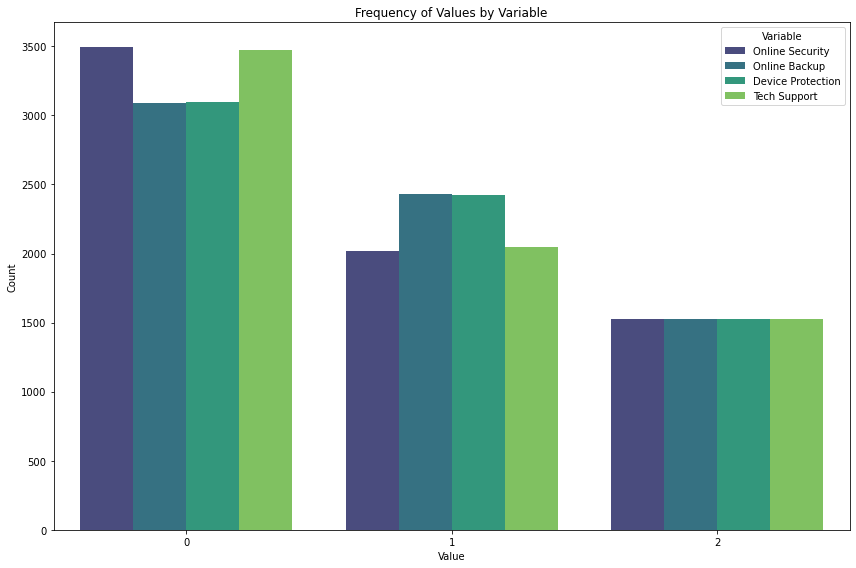

In [576]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Create the frequency graph
sns.countplot(
    x='value',
    hue= 'variable'
    data=df_melt,
    palette='viridis',
    ax=ax
)

# Set the title and axis labels
plt.title('Frequency of Values by Variable')
plt.xlabel('Value')
plt.ylabel('Count')

# Adjust the legend
plt.legend(title='Variable')


# Adjust the layout
plt.tight_layout()
plt.show()

In [362]:
df_supp.head()

,Online Security,Online Backup,Device Protection,Tech Support,Churn Value
0,1,1,0,0,1
1,0,0,0,0,1
2,0,0,1,0,1
3,0,0,1,1,1
4,0,1,1,0,1


In [363]:
df_melt = pd.melt(
    df_supp, id_vars = 'Churn Value', value_vars = ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support']
)


In [ ]:
df_plot = [['variable' : ['Online Security', 'Online Security', 'Online Security', 'Online Backup', 'Online Backup', 'Online Backup', 'Device Protection', 'Device Protection', 'Device Protection', 'Tech Support', 'Tech Support', 'Tech Support'],  

In [588]:
df_melt['value'].value_counts()

0    13154
1     8914
2     6104
Name: value, dtype: int64

In [600]:
df_supp.columns

Index(['Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Churn Value'],
      dtype='object')

In [612]:
grouped_data

,variable,value,Churn Value,Count
0,Device Protection,0,0,1884
1,Device Protection,0,1,1211
2,Device Protection,1,0,1877
3,Device Protection,1,1,545
4,Device Protection,2,0,1413
5,Device Protection,2,1,113
6,Online Backup,0,0,1855
7,Online Backup,0,1,1233
8,Online Backup,1,0,1906
9,Online Backup,1,1,523


In [629]:
grouped_data

,variable,value,Churn Value,Count
0,Device Protection,0,0,1884
1,Device Protection,0,1,1211
2,Device Protection,1,0,1877
3,Device Protection,1,1,545
4,Device Protection,2,0,1413
5,Device Protection,2,1,113
6,Online Backup,0,0,1855
7,Online Backup,0,1,1233
8,Online Backup,1,0,1906
9,Online Backup,1,1,523


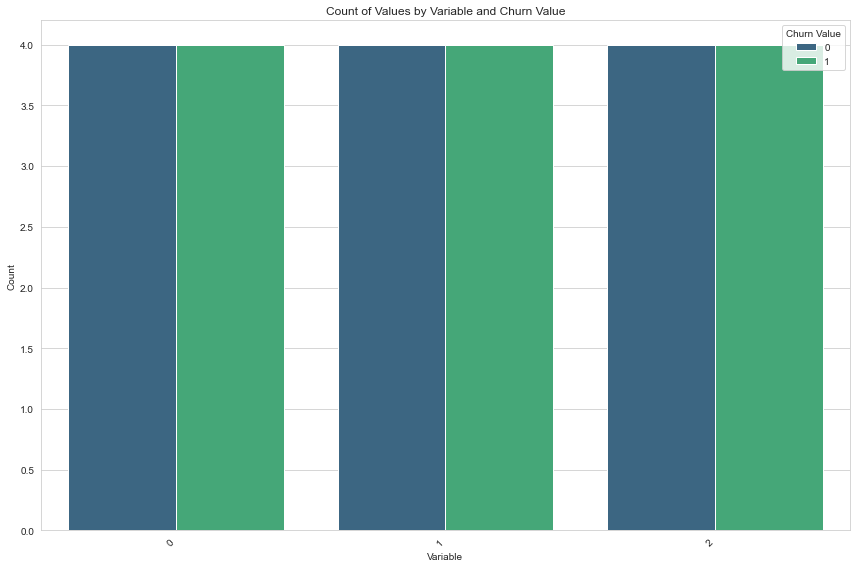

In [645]:

# Grouping the data by 'Variable', 'Value', and 'Churn Value' and getting the count
grouped_data = df_melt.groupby(['variable', 'value', 'Churn Value']).size().reset_index(name='Count')

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))



In [50]:
pd.set_option('display.max_rows', None)

In [647]:
df_supp.shape

(5517, 5)

In [301]:
df_plot = pd.melt(df_supp).sort_values(by='value', ascending=True)

TypeError: '<' not supported between instances of 'int' and 'str'

In [660]:
df_supp

,Online Security,Online Backup,Device Protection,Tech Support,Churn Value
0,1,1,0,0,1
1,0,0,0,0,1
2,0,0,1,0,1
3,0,0,1,1,1
4,0,1,1,0,1
...,...,...,...,...,...
7038,2,2,2,2,0
7039,1,0,1,1,0
7040,0,1,1,0,0
7041,1,0,0,0,0


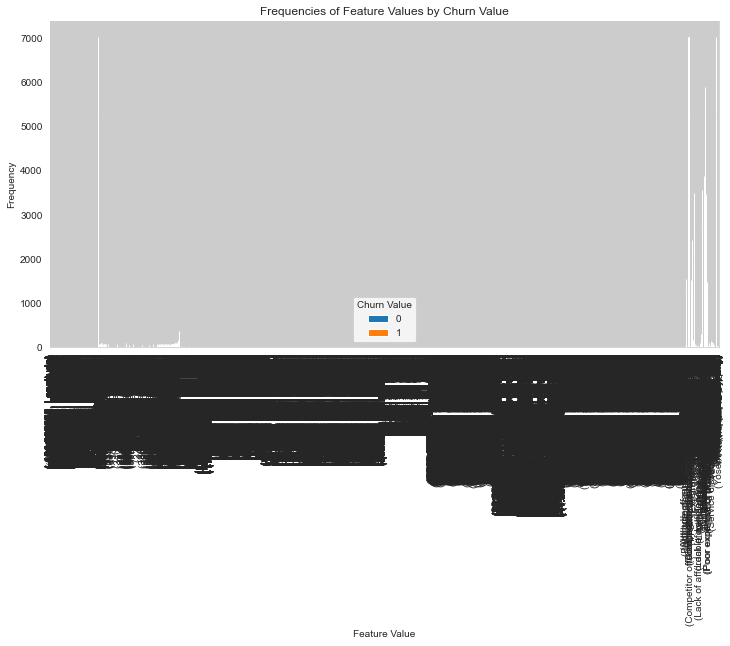

In [687]:
# Melt the DataFrame to get the variable names and their values
melted_df = df.melt(id_vars='Churn Value', var_name='Feature', value_name='Value')

# Create a pivot table to get the count of each feature value by churn value
pivot_table = melted_df.groupby(['Value', 'Feature', 'Churn Value']).size().unstack(fill_value=0)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, ax=ax)

# Set the title and axis labels
ax.set_title('Frequencies of Feature Values by Churn Value')
ax.set_xlabel('Feature Value')
ax.set_ylabel('Frequency')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the legend
ax.legend(title='Churn Value')

# Display the plot
plt.show()

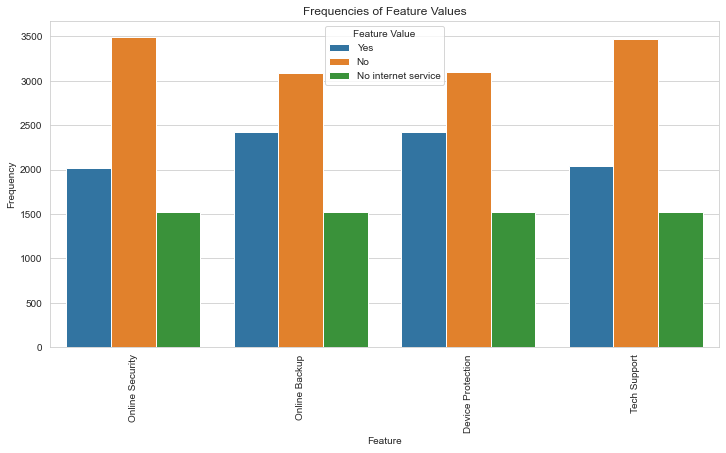

In [668]:

# Melt the data to get the feature values in a single column
melted_df = pd.melt(df, id_vars=['Churn Value'], var_name='Feature', value_name='Value')

# Filter the dataframe to include only the specified features
features = ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support']
melted_df = melted_df[melted_df['Feature'].isin(features)]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create the stacked bar plot with side-by-side feature values
sns.countplot(x='Feature', hue='Value', data=melted_df, ax=ax)

# Set the title and axis labels
ax.set_title('Frequencies of Feature Values')
ax.set_xlabel('Feature')
ax.set_ylabel('Frequency')


# Display the legend
ax.legend(title='Feature Value')

# Display the plot
plt.show()

In [186]:
def feature_eng(dataframe):
    
    # Make a copy of dataframe
    df = dataframe.copy()
    
    ##### Mapping columns #######
    # list of columns with yes's and no's
    yn_cols = ['Senior Citizen','Partner','Dependents','Phone Service','Multiple Lines','Online Security',
             'Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies',
             'Paperless Billing']
    # mapping these columns
    for col in yn_cols:
        df[f'{col}'] = df[f'{col}'].map({'No':0, 'Yes':1, 'No phone service':0, 'No internet service':0, 0:0, 1:1})
        df[f'{col}'].astype(int)
    # mapping gender column
    df['Gender'] = df['Gender'].map({'Male':0, 'Female': 1})
    
    ###### Drop Columns #########
    df.drop(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
            'Lat Long', 'Latitude', 'Longitude', 'Churn Label', 'Churn Reason'], axis = 1, inplace = True)
    
    ###### OHE ###############
    df = pd.get_dummies(data = df, columns = ['Internet Service'], prefix='IS', drop_first=False, dtype = int)
    df = pd.get_dummies(data = df, columns = ['Contract'], prefix='Con', drop_first=False, dtype = int)
    df = pd.get_dummies(data = df, columns = ['Payment Method'], prefix='Pay', drop_first=False, dtype = int)
    
    # Churn Reason has nulls
#     df['Churn Reason'] = df['Churn Reason'].fillna(value = 'None')
#   df = pd.get_dummies(data = df, columns = ['Churn Reason'], prefix='Reason', drop_first=True, dtype = int)

    
    ##### Target Columns - hidden nulls in diguise 
    df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

    # Fills nulls with zeros 
    df['Total Charges'] = df['Total Charges'].fillna(value = 0)
    
    return df

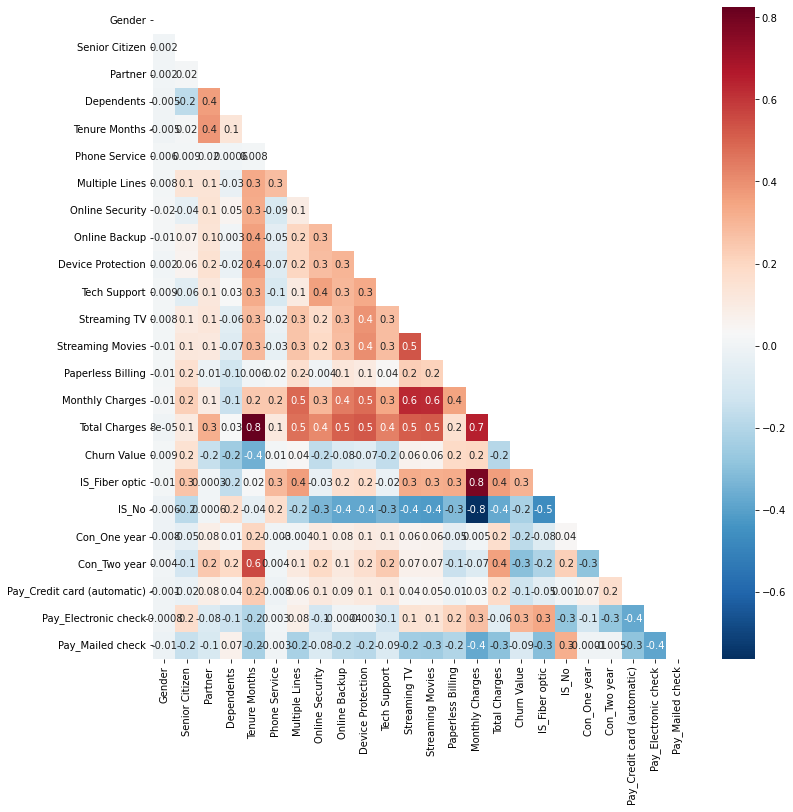

In [250]:
matrix = feature_eng(df).corr()

plt.figure(figsize = (12, 12))
sns.heatmap(matrix,
            cmap = 'RdBu_r',
            annot=True,
            fmt = '.1',
            mask = np.triu(matrix))

plt.show()

In [187]:
df_x = df.drop('Churn Value', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(feature_eng(df_x), df['Churn Value'], test_size = 0.2, random_state = 42)

In [251]:
X_train.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Paperless Billing', 'Monthly Charges', 'Total Charges',
       'IS_Fiber optic', 'IS_No', 'Con_One year', 'Con_Two year',
       'Pay_Credit card (automatic)', 'Pay_Electronic check',
       'Pay_Mailed check'],
      dtype='object')

In [18]:
# features = ['Gender', 'Senior Citizen',
#        'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
#        'Multiple Lines', 'Internet Service', 'Online Security',
#        'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
#        'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
#        'Monthly Charges', 'Total Charges', 'Churn Value']

In [144]:
rf = RandomForestClassifier(n_estimators=50) # Random Forest

In [551]:
## Check respective cross validation scores if overfitting need to tune as shown below

rf_score = cross_val_score(rf, X_train, y_train, cv=5)
 
#Step 1: Select parameters
rf_params = {

   'criterion': ['gini','entropy'],
    
    'n_estimators': [200],

    'max_depth': [6],

    'min_samples_split': [6],

    'min_samples_leaf': [8]
}
# (n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2,
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt',
# max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False,
# n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
# ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
# Create a grid search object

gs = GridSearchCV(rf, param_grid=rf_params, cv=10, verbose = 1) # k = 5

# Fit grid search on the training set

gs.fit(X_train[['Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
        'Online Security',  'Tech Support',
       'Paperless Billing', 'Monthly Charges', 'Total Charges',
       'IS_Fiber optic', 'IS_No', 'Con_One year', 'Con_Two year',
       'Pay_Credit card (automatic)', 'Pay_Electronic check']], y_train)

# Save my best model as a random forest model

best_rf = gs.best_estimator_

# I use the model to predict on X_train

y_pred = best_rf.predict(X_train[['Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
        'Online Security',  'Tech Support',
       'Paperless Billing', 'Monthly Charges', 'Total Charges',
       'IS_Fiber optic', 'IS_No', 'Con_One year', 'Con_Two year',
       'Pay_Credit card (automatic)', 'Pay_Electronic check']])

Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [552]:
gs.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       min_samples_split=6, n_estimators=200)

In [553]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 8,
 'min_samples_split': 6,
 'n_estimators': 200}

In [378]:
def apr(y_pred, y_real):

    accuracy = metrics.accuracy_score(y_real, y_pred)

    precision = metrics.precision_score(y_real, y_pred)

    recall = metrics.recall_score(y_real, y_pred)

    f1 = metrics.f1_score(y_real, y_pred)

    

    print(f"Accuracy:{accuracy}")

    print(f"Precision:{precision}")

    print(f"Recall:{recall}")

    print(f"F1:{f1}")

    return accuracy, precision, recall, f1

In [ ]:
# base:
# Accuracy:0.8097266595669151
# Precision:0.7212931995540691
# Recall:0.4404356705241661
# F1:0.5469146238377007

In [ ]:
# including max_features:
# Accuracy:0.8102591409300675
# Precision:0.7105263157894737
# Recall:0.45949625595643295
# F1:0.5580818520049607

In [ ]:
#     'n_estimators': [100, 150, 200, 300], # 3 options

#     'max_depth': [None, 3, 4, 5, 7],
    
#     'max_features':[5, 7]
#     cv = 5
# Accuracy:0.8267660631877884
# Precision:0.717948717948718
# Recall:0.5527569775357386
# F1:0.6246153846153846

In [ ]:
# {'criterion': 'gini',
#  'max_depth': None,
#  'min_samples_leaf': 5,
#  'min_samples_split': 3,
#  'n_estimators': 200}

# Accuracy:0.8766418175363863
# Precision:0.8302047781569966
# Recall:0.6623553437712729
# F1:0.7368421052631579

In [ ]:
# {'criterion': 'entropy',
#  'max_depth': None,
#  'min_samples_leaf': 5,
#  'min_samples_split': 3,
#  'n_estimators': 175}

# Accuracy:0.8780617678381256
# Precision:0.8330494037478705
# Recall:0.6657590197413207
# F1:0.7400681044267877

In [554]:
apr(y_pred, y_train)

Accuracy:0.8125665601703941
Precision:0.7117948717948718
Recall:0.472430224642614
F1:0.5679214402618658


(0.8125665601703941, 0.7117948717948718, 0.472430224642614, 0.5679214402618658)

In [555]:
y_pred = best_rf.predict(X_test[['Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
        'Online Security',  'Tech Support',
       'Paperless Billing', 'Monthly Charges', 'Total Charges',
       'IS_Fiber optic', 'IS_No', 'Con_One year', 'Con_Two year',
       'Pay_Credit card (automatic)', 'Pay_Electronic check']])

In [556]:
apr(y_pred, y_test)

Accuracy:0.7955997161107168
Precision:0.7121212121212122
Recall:0.47
F1:0.5662650602409639


(0.7955997161107168, 0.7121212121212122, 0.47, 0.5662650602409639)

In [40]:
print(list(zip(X_train.columns, best_rf.feature_importances_)))

[('Gender', 0.0025278080812622915), ('Senior Citizen', 0.006034382045082255), ('Partner', 0.004975319287202808), ('Dependents', 0.05679249393718682), ('Tenure Months', 0.157408687322887), ('Phone Service', 0.0034626814756349156), ('Multiple Lines', 0.006150404919922603), ('Online Security', 0.01652534118220345), ('Online Backup', 0.006199590518406234), ('Device Protection', 0.002604547610229848), ('Tech Support', 0.010677485914931973), ('Streaming TV', 0.005266908609296769), ('Streaming Movies', 0.005005280425194983), ('Paperless Billing', 0.019622169488879192), ('Monthly Charges', 0.08191732647270715), ('Total Charges', 0.10259363038905712), ('IS_DSL', 0.017294175696330072), ('IS_Fiber optic', 0.11410302034162298), ('IS_No', 0.027812459461876632), ('Con_Month-to-month', 0.1734529459887355), ('Con_One year', 0.020764933277937655), ('Con_Two year', 0.07890088453860253), ('Pay_Bank transfer (automatic)', 0.0019906851507555828), ('Pay_Credit card (automatic)', 0.004257974410412748), ('Pay

In [ ]:
#logistoc reg

In [119]:
# feature_cols = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
#        'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
#        'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
#        'Paperless Billing', 'Monthly Charges', 'Total Charges',
#        'IS_DSL', 'IS_Fiber optic', 'IS_No', 'Con_Month-to-month',
#        'Con_One year', 'Con_Two year', 'Pay_Bank transfer (automatic)',
#        'Pay_Credit card (automatic)', 'Pay_Electronic check',
#        'Pay_Mailed check']

df_x = df.drop('Churn Value', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df_x, df['Churn Value'], test_size = 0.2, random_state = 42)

In [73]:
df_x.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,Competitor had better devices


In [120]:
def feature_eng(dataframe):
    
    # Make a copy of dataframe
    df = dataframe.copy()
    
    ##### Mapping columns #######
    # list of columns with yes's and no's
    yn_cols = ['Senior Citizen','Partner','Dependents','Phone Service','Multiple Lines','Online Security',
             'Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies',
             'Paperless Billing']
    # mapping these columns
    for col in yn_cols:
        df[f'{col}'] = df[f'{col}'].map({'No':0, 'Yes':1, 'No phone service':0, 'No internet service':0, 0:0})
        df[f'{col}'].astype(int)
    # mapping gender column
    df['Gender'] = df['Gender'].map({'Male':0, 'Female': 1})
    
    ###### Drop Columns #########
    df.drop(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
            'Lat Long', 'Latitude', 'Longitude', 'Churn Label', 'Churn Reason'], axis = 1, inplace = True)
    
    ###### OHE ###############
    df = pd.get_dummies(data = df, columns = ['Internet Service'], prefix='IS', drop_first=False, dtype = int)
    df = pd.get_dummies(data = df, columns = ['Contract'], prefix='Con', drop_first=False, dtype = int)
    df = pd.get_dummies(data = df, columns = ['Payment Method'], prefix='Pay', drop_first=False, dtype = int)
    
    # Churn Reason has nulls
#     df['Churn Reason'] = df['Churn Reason'].fillna(value = 'None')
#   df = pd.get_dummies(data = df, columns = ['Churn Reason'], prefix='Reason', drop_first=True, dtype = int)

    
    ##### Target Columns - hidden nulls in diguise 
    df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

    # Fills nulls with zeros 
    df['Total Charges'] = df['Total Charges'].fillna(value = 0)
    
    return df

In [121]:
X_train_fe = feature_eng(X_train)

In [122]:
lr = LogisticRegression(max_iter=300, random_state=10)

In [123]:
lr.fit(X_train_fe, y_train)

LogisticRegression(max_iter=300, random_state=10)

In [124]:
X_train_fe[['prob_stay', 'prob_churn']] = lr.predict_proba(X_train_fe)

In [95]:
X_train_fe.head(10)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,...,IS_Fiber optic,IS_No,Con_One year,Con_Two year,Pay_Credit card (automatic),Pay_Electronic check,Pay_Mailed check,prob_stay,prob_churn,y_pred
2142,0,0,1,0,71,1,1,0,0,1,...,1,0,1,0,1,0,0,0.814387,0.185613,0
1623,1,0,0,0,16,1,0,0,1,1,...,1,0,0,0,1,0,0,0.469827,0.530173,1
6074,1,0,0,0,32,1,1,0,1,1,...,1,0,1,0,1,0,0,0.587713,0.412287,0
1362,1,1,1,0,24,0,0,0,0,1,...,0,0,0,0,1,0,0,0.574058,0.425942,0
6754,1,0,1,1,20,1,0,0,0,0,...,0,1,0,0,0,0,1,0.973452,0.026548,0
1212,1,0,0,0,2,1,1,0,0,0,...,1,0,0,0,0,1,0,0.233862,0.766138,1
2722,1,0,1,0,52,1,0,1,0,1,...,0,0,1,0,0,0,1,0.929582,0.070418,0
4006,1,0,1,0,37,1,0,0,0,0,...,0,1,1,0,0,0,0,0.957290,0.042710,0
6791,1,0,0,0,41,1,1,1,0,1,...,0,0,0,0,0,0,0,0.880530,0.119470,0
5466,0,0,1,1,58,1,0,0,1,0,...,0,0,1,0,1,0,0,0.986746,0.013254,0


In [125]:
X_train_fe['y_pred'] = np.where(X_train_fe['prob_churn']>.5, 1, 0)

In [126]:
print(metrics.confusion_matrix(y_train, X_train_fe['y_pred']))

[[3739  426]
 [ 619  850]]


In [127]:
def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
    print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')

In [128]:
get_results(y_train, X_train_fe['y_pred'])

The confusion matrix for your predictions is:
[[3739  426]
 [ 619  850]] 

The accuracy of your model is: 0.8145189918352858
The recall of your model is: 0.5786249149081008
The precision of your model is: 0.6661442006269592
The F1-score of your model is: 0.6193078324225865


In [129]:
X_test_fe = feature_eng(X_test)

In [130]:
X_test_fe[['prob_stay', 'prob_churn']] = lr.predict_proba(X_test_fe)

In [131]:
X_test_fe['y_pred'] = np.where(X_test_fe['prob_churn']>.5, 1, 0)

In [132]:
get_results(y_test, X_test_fe['y_pred'])

The confusion matrix for your predictions is:
[[896 113]
 [169 231]] 

The accuracy of your model is: 0.7998580553584103
The recall of your model is: 0.5775
The precision of your model is: 0.6715116279069767
The F1-score of your model is: 0.6209677419354839


In [133]:
print(list(zip(X_train_fe.columns, lr.coef_[0])))

[('Gender', 0.0801336364940116), ('Senior Citizen', 0.2925718227009908), ('Partner', 0.07778172954942364), ('Dependents', -1.0641045857206994), ('Tenure Months', -0.07208557458558003), ('Phone Service', -0.6148800522358479), ('Multiple Lines', 0.2345544921410788), ('Online Security', -0.4629035757862017), ('Online Backup', -0.11442313899865074), ('Device Protection', -0.0333713206103921), ('Tech Support', -0.4533874061389644), ('Streaming TV', 0.1254250511974633), ('Streaming Movies', 0.08418737071956245), ('Paperless Billing', 0.5193741892720122), ('Monthly Charges', 0.004820219669800274), ('Total Charges', 0.0004329850006932035), ('IS_DSL', 0.0024327226663622982), ('IS_Fiber optic', 0.29042758676620367), ('IS_No', -0.611263185514758), ('Con_Month-to-month', 0.5020649623366469), ('Con_One year', -0.2669256638948719), ('Con_Two year', -0.5535421745238508), ('Pay_Bank transfer (automatic)', -0.08171587766235824), ('Pay_Credit card (automatic)', -0.22654284254194593), ('Pay_Electronic ch

In [135]:
sorted(list(zip(X_train_fe.columns, lr.coef_[0])), key = lambda x: x[1], reverse = True)

[('Paperless Billing', 0.5193741892720122),
 ('Con_Month-to-month', 0.5020649623366469),
 ('Senior Citizen', 0.2925718227009908),
 ('IS_Fiber optic', 0.29042758676620367),
 ('Pay_Electronic check', 0.24879959515388694),
 ('Multiple Lines', 0.2345544921410788),
 ('Streaming TV', 0.1254250511974633),
 ('Streaming Movies', 0.08418737071956245),
 ('Gender', 0.0801336364940116),
 ('Partner', 0.07778172954942364),
 ('Monthly Charges', 0.004820219669800274),
 ('IS_DSL', 0.0024327226663622982),
 ('Total Charges', 0.0004329850006932035),
 ('Device Protection', -0.0333713206103921),
 ('Tenure Months', -0.07208557458558003),
 ('Pay_Bank transfer (automatic)', -0.08171587766235824),
 ('Online Backup', -0.11442313899865074),
 ('Pay_Credit card (automatic)', -0.22654284254194593),
 ('Pay_Mailed check', -0.25894375103134615),
 ('Con_One year', -0.2669256638948719),
 ('Tech Support', -0.4533874061389644),
 ('Online Security', -0.4629035757862017),
 ('Con_Two year', -0.5535421745238508),
 ('IS_No', -0.

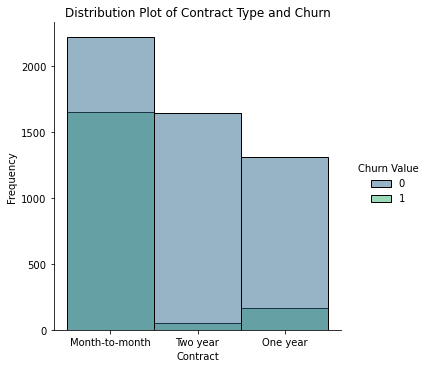

In [139]:
sns.displot(data=df, x='Contract', hue='Churn Value', kind='hist',  palette='viridis')
plt.title('Distribution Plot of Contract Type and Churn')
plt.xlabel('Contract')
plt.ylabel('Frequency')
plt.show()

In [136]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices
